In [1]:
import pandas as pd
import chess
import chess.pgn
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys

In [2]:
def fen_to_bitboard(fen):
    row, column = 0, 0
    bitboard = np.zeros((18, 8, 8))
    classic_score = 0
    for c in fen:
        if c == " ":
            break
        elif c == "P":
            classic_score += 1
            bitboard[0][row][column] = 1
            column += 1
        elif c == "p":
            classic_score -= 1
            bitboard[6][row][column] = 1
            column += 1
        elif c == "R":
            classic_score += 5
            bitboard[1][row][column] = 1
            column += 1
        elif c == "r":
            classic_score -= 5
            bitboard[7][row][column] = 1
            column += 1
        elif c == "N":
            classic_score += 3
            bitboard[2][row][column] = 1
            column += 1
        elif c == "n":
            classic_score -= 3
            bitboard[8][row][column] = 1
            column += 1
        elif c == "B":
            classic_score += 3
            bitboard[3][row][column] = 1
            column += 1
        elif c == "b":
            classic_score -= 3
            bitboard[9][row][column] = 1
            column += 1
        elif c == "Q":
            classic_score += 9
            bitboard[4][row][column] = 1
            column += 1
        elif c == "q":
            classic_score -= 9
            bitboard[10][row][column] = 1
            column += 1
        elif c == "K":
            bitboard[5][row][column] = 1
            column += 1
        elif c == "k":
            bitboard[11][row][column] = 1
            column += 1
        elif c == "/":
            row += 1
            column = 0
        elif c in "123456789":
            column += int(c)
    
    castle_rights = fen.split(" ")[2]
    for i in range(8):
        for j in range(8):
            bitboard[12][i][j] = int("K" in castle_rights)
    for i in range(8):
        for j in range(8):
            bitboard[13][i][j] = int("Q" in castle_rights)
    for i in range(8):
        for j in range(8):
            bitboard[14][i][j] = int("k" in castle_rights)
    for i in range(8):
        for j in range(8):
            bitboard[15][i][j] = int("q" in castle_rights)
    
    turn = fen.split(" ")[1]
    for i in range(8):
        for j in range(8):
            bitboard[16][i][j] = int(turn == "b")
    
    for i in range(8):
        for j in range(8):
            bitboard[17][i][j] = classic_score / 39
        
    return bitboard

In [3]:
9+10+6+6+8

39

In [7]:
pgn = open("./lichess/lichess_db_standard_rated_2013-01.pgn")
pgn

<_io.TextIOWrapper name='./lichess/lichess_db_standard_rated_2013-01.pgn' mode='r' encoding='UTF-8'>

In [5]:
game = chess.pgn.read_game(pgn)
game

<Game at 0x124fc1910 ('BFG9k' vs. 'mamalak', '????.??.??' at 'https://lichess.org/j1dkb5dw')>

In [6]:
game.headers

Headers(Event='Rated Classical game', Site='https://lichess.org/j1dkb5dw', Date='????.??.??', Round='?', White='BFG9k', Black='mamalak', Result='1-0', UTCDate='2012.12.31', UTCTime='23:01:03', WhiteElo='1639', BlackElo='1403', WhiteRatingDiff='+5', BlackRatingDiff='-8', ECO='C00', Opening='French Defense: Normal Variation', TimeControl='600+8', Termination='Normal')

In [8]:
# get time control
time_controls = set()
for i in tqdm(range(121333)):
    try:
        game = chess.pgn.read_game(pgn)
    except:
        continue

    if game == None:
        break
        
    tc = game.headers["TimeControl"]
    time_controls.add(tc)

 10%|▉         | 11688/121333 [00:31<04:55, 371.40it/s]

KeyboardInterrupt



In [9]:
time_controls

{'-',
 '0+1',
 '0+10',
 '0+2',
 '0+3',
 '0+4',
 '0+5',
 '1020+1',
 '1140+0',
 '120+0',
 '120+1',
 '120+10',
 '120+11',
 '120+14',
 '120+17',
 '120+2',
 '120+3',
 '120+4',
 '120+5',
 '120+8',
 '1200+0',
 '1200+1',
 '1200+10',
 '1200+15',
 '1200+2',
 '1200+30',
 '1200+4',
 '1200+5',
 '1260+10',
 '1320+8',
 '1380+11',
 '1440+8',
 '1500+0',
 '1500+10',
 '1500+8',
 '1560+30',
 '1620+8',
 '1680+25',
 '1680+28',
 '1740+30',
 '180+0',
 '180+1',
 '180+10',
 '180+15',
 '180+2',
 '180+3',
 '180+30',
 '180+4',
 '180+5',
 '180+7',
 '180+8',
 '1800+0',
 '1800+10',
 '1800+2',
 '1800+30',
 '1800+5',
 '1800+8',
 '240+0',
 '240+1',
 '240+2',
 '240+3',
 '240+4',
 '240+5',
 '240+6',
 '240+8',
 '300+0',
 '300+1',
 '300+10',
 '300+11',
 '300+12',
 '300+14',
 '300+15',
 '300+16',
 '300+2',
 '300+20',
 '300+26',
 '300+28',
 '300+3',
 '300+30',
 '300+4',
 '300+5',
 '300+6',
 '300+7',
 '300+8',
 '300+9',
 '360+0',
 '360+10',
 '360+14',
 '360+15',
 '360+2',
 '360+20',
 '360+3',
 '360+4',
 '360+5',
 '360+6',
 '36

In [15]:
# PGN -> Dictionary of FENs
fen_dict = {}

for i in tqdm(range(121333)):
    try:
        game = chess.pgn.read_game(pgn)
    except:
        continue

    if game == None:
        break

    result_str = game.headers["Result"]
    result_dict = {"1-0": 1, "1/2-1/2": 0.5, "0-1": 0}
    if result_str not in result_dict.keys():
        continue
    results = result_dict[result_str]

    board = game.board()
    fen = board.fen()
    fen = " ".join(fen.split(' ')[:-3])

    if fen not in fen_dict:
        fen_dict[fen] = [0, 0, 0]
    fen_dict[fen][2 - int(results*2)] += 1

    for move in game.mainline_moves():
        board.push(move)
        fen = board.fen()
        fen = " ".join(fen.split(' ')[:-3])

        if fen not in fen_dict:
            fen_dict[fen] = [0, 0, 0]
        fen_dict[fen][2 - int(results*2)] += 1

100%|█████████████████████████████████▉| 121332/121333 [14:00<00:00, 144.33it/s]


In [16]:
type(game)

NoneType

In [27]:
fen_dict

{'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq': [62129, 3982, 55221],
 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq': [36889, 2279, 33320],
 'rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq': [3748, 273, 3735],
 'rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBNR b KQkq': [1893, 136, 1676],
 'rnbqkbnr/p1pp1ppp/1p2p3/8/3PP3/8/PPP2PPP/RNBQKBNR w KQkq': [130, 10, 107],
 'rnbqkbnr/p1pp1ppp/1p2p3/8/3PP3/P7/1PP2PPP/RNBQKBNR b KQkq': [4, 0, 0],
 'rn1qkbnr/pbpp1ppp/1p2p3/8/3PP3/P7/1PP2PPP/RNBQKBNR w KQkq': [4, 0, 0],
 'rn1qkbnr/pbpp1ppp/1p2p3/8/3PP3/P1N5/1PP2PPP/R1BQKBNR b KQkq': [16, 1, 5],
 'rn1qkb1r/pbpp1ppp/1p2p2n/8/3PP3/P1N5/1PP2PPP/R1BQKBNR w KQkq': [1, 0, 0],
 'rn1qkb1r/pbpp1ppp/1p2p2B/8/3PP3/P1N5/1PP2PPP/R2QKBNR b KQkq': [1, 0, 0],
 'rn1qkb1r/pbpp1p1p/1p2p2p/8/3PP3/P1N5/1PP2PPP/R2QKBNR w KQkq': [1, 0, 0],
 'rn1qkb1r/pbpp1p1p/1p2p2p/8/3PP3/P1N5/1PP1BPPP/R2QK1NR b KQkq': [1, 0, 0],
 'rn2kb1r/pbpp1p1p/1p2p2p/6q1/3PP3/P1N5/1PP1BPPP/R2QK1NR w KQkq': [1, 0, 0],
 'rn2kb1r/

In [28]:
len(fen_dict)

7048424

In [29]:
sys.getsizeof(fen_dict) / 1000000

246.06592

In [30]:
counter = 0
for item in fen_dict:
    if sum(fen_dict[item]) == 1:
        counter += 1
counter

6893739

In [31]:
counter / len(fen_dict) * 100

97.80539592964328

In [34]:
data = []
counter = 0

for fen in tqdm(fen_dict):
    bitboard = fen_to_bitboard(fen)
    bitboard = bitboard.flatten()
    
    for bit in bitboard:
        if bit != 0 and bit != 1:
            continue
            
    label = (fen_dict[fen][0] - fen_dict[fen][2]) / sum(fen_dict[fen])
    entry = np.append(bitboard, label)
    has_nan = np.isnan(entry).any()
    has_inf = np.isinf(entry).any()
    
    if has_nan or has_inf:
        continue
        
    data.append(entry)
    
    if len(data) >= 1280:
        df = pd.DataFrame(data)
        df.to_csv(f"./lichess/data_c0/lichess_{counter}.csv", encoding = 'utf-8', index=False)
        data = []
        counter += 1

100%|██████████████████████████████| 7048424/7048424 [2:55:48<00:00, 668.19it/s]


In [33]:
df = pd.read_csv('./lichess/data_c0/lichess_0.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056935
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049236
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001676
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058570
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,1.000000
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,1.000000
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,1.000000
1278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,1.000000


In [5]:
csvs = []
for csv in os.listdir("./lichess/data_c0/"):
    if ".csv" in csv:
        csvs.append(csv)
len(csvs)

5506

In [6]:
dfs = []
counter = 0

for i in tqdm(range(len(csvs))):
    try:
        temp_df = pd.read_csv("./lichess/data_c0/" + csvs[i])
    except:
        continue

    dfs.append(temp_df)

    if len(dfs) >= 100:
        df = pd.concat(dfs)
        column_names = df.columns.tolist()

        # Rename the last column to 'result'
        column_names[-1] = "result"

        # Update the column names of the DataFrame
        df.columns = column_names

        df.to_csv(f'./lichess/data_c1/bitboard_{counter}.csv',encoding = 'utf-8', index = False)
        counter += 1
        dfs = []
df.to_csv(f'./lichess/data_c1/bitboard_{counter}.csv', index = False)

100%|█████████████████████████████████████| 5506/5506 [2:18:16<00:00,  1.51s/it]


In [7]:
csvs = []
for csv in os.listdir("./lichess/data_c1/"):
    if ".csv" in csv:
        csvs.append(csv)
len(csvs)

56

In [8]:
for csv in tqdm(csvs):
    try:
        pd.read_csv('./lichess/data_c1/' + csv)
    except:
        print(f"ERROR: {csv}")

100%|███████████████████████████████████████████| 56/56 [35:01<00:00, 37.52s/it]


In [9]:
test_df = pd.read_csv('./lichess/data_c1/bitboard_0.csv')
test_df

,0,1,2,3,4,5,6,7,8,9,...,1079,1080,1081,1082,1083,1084,1085,1086,1087,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
127997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
test_df.result.mean()

0.02113134615773831

In [11]:
positions = [[test_df[str(col)].mean() for col in range(64*i, 64*(i+1))] for i in range(12)]

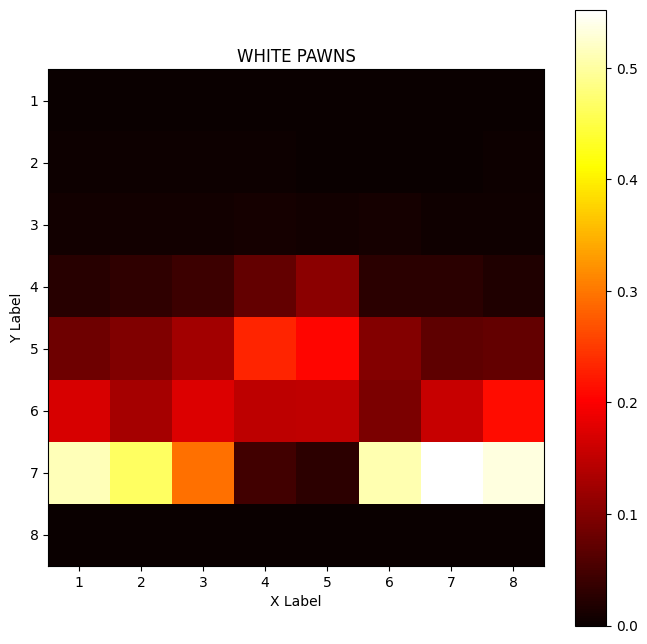

In [12]:
piece_dict = {
    0: "WHITE PAWNS",
    1: "WHITE ROOKS",
    2: "WHITE KNIGHTS",
    3: "WHITE BISHOPS",
    4: "WHTIE QUEEN",
    5: "WHITE KING",
    6: "BLACK PAWNS",
    7: "BLACK ROOKS",
    8: "BLACK KNIGTHS",
    9: "BLACK BISHOPS",
    10: "BLACK QUEEN",
    11: "BLACK KING"
}

piece_index = 0

plt.figure(figsize=(8, 8))
plt.imshow(np.array(positions[piece_index]).reshape(8,8), cmap='hot', interpolation='nearest')

# Customize the heatmap
plt.colorbar()
plt.title(piece_dict[piece_index])
plt.xticks(np.arange(8), np.arange(1, 9))  # Set X-axis labels from 1 to 8
plt.yticks(np.arange(8), np.arange(1, 9))  # Set Y-axis labels from 1 to 8
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Display the heatmap
plt.show()